# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [10]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 6.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.4/229.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 6.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Откройте файл с данными и изучите общую информацию. 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

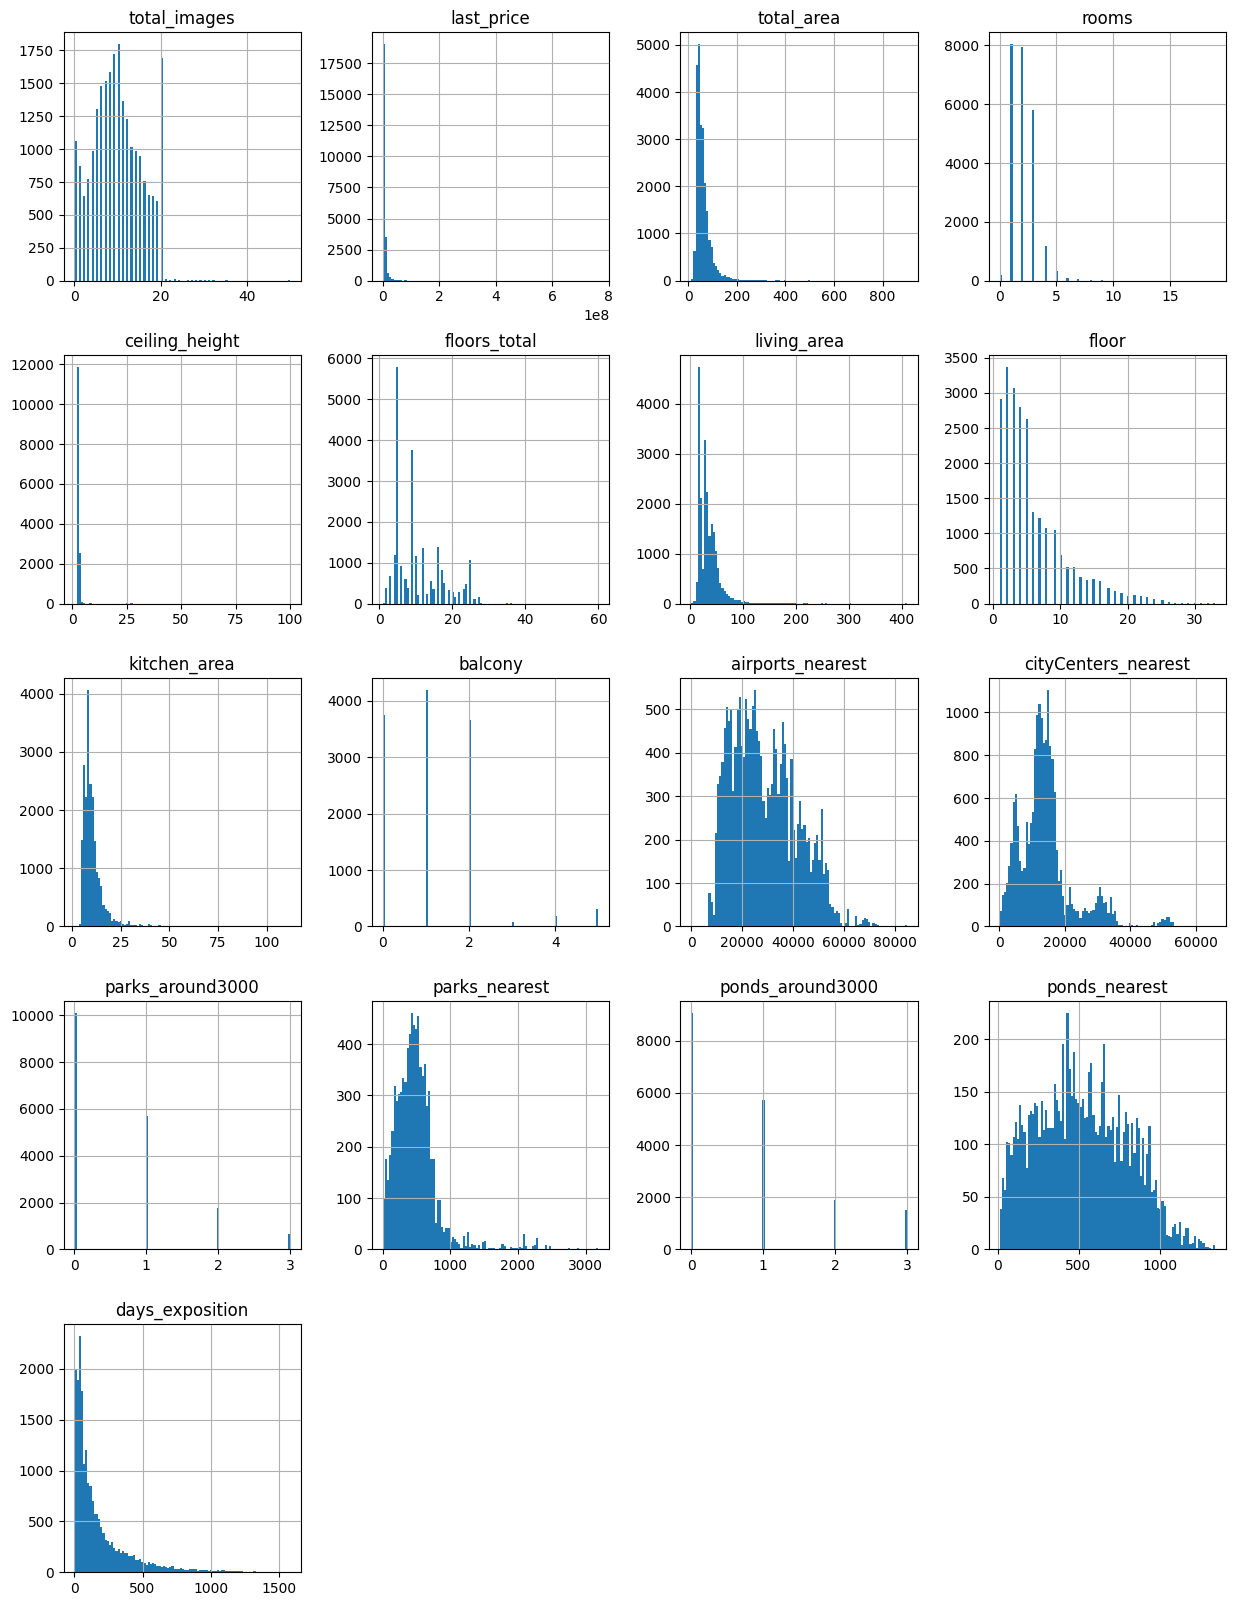

In [12]:
import pandas as pd
data = pd.read_csv('/Users/denismaslov/yandex_projects/yandex/sprint3/real_estate_data.csv', sep='\t')
#Вывод датафрейма, построение гистограмм, инфо датафрейма
display(data.head(10))
data.hist(bins=100, figsize=(15, 20))
data.info()


1. В датафрейме представлены данные по недвижимости, которые содержат характеристики этой недвижимости и картографические данные, которые указывают на ее месторасположение.<br>
2. В датафрейме достаточно много пропусков.<br>
3. Тип колонок не соответствует описанию и смыслу<br>
4. В колонке locality_name встречается разное написание населенных пунктов<br>
5. В данных часто встречаются выбросы, что портит картину на графиках и не позволяет их проанализировать.<br>
6. Необходимо обработать датафрейм, очистить от пропусков, явных и не явных дубликатов, привести значения в единый формат, привести все колонки к типу заявленному в описании.<br>



### Предобработка данных

In [13]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Причины, которые могли привести к пропускам данных:
1. Отсутствие информации: Иногда некоторые данные могут быть недоступны изначально или не были заполнены при сборе или вводе данных, например пользователю просто лень было.
2. Некорректный ввод данных: Ошибки ввода данных могут привести к пропускам. Например, пользователь мог случайно пропустить ввод определенного значения или ввести его неправильно, например заполнил числовые данные словами.
3. Технические проблемы: Проблемы сбора данных или ошибки в процессе передачи данных могут привести к пропускам. Например, сбой в системе, ошибки сети или проблемы с хранением данных могут вызвать потерю информации.
Проанализируем пропуски:
1. Большое количество пропусков в 'total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'balcony', 'is_apartment', а также в колонках значения которых взято из картографических данных.
2. Небольшое количество пропусков в 'floors_total'

In [14]:
#удаляем пропуски в 'floors_total'
data = data.dropna(subset=['floors_total'])
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9118
floors_total                0
living_area              1870
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Так как 'floors_total' небольшое количество пропусков, и их удаление не окажет значительного влияние на выборку, удаляем их.

In [15]:
#заполняем пропуски 'is_apartment' занчением True
data['is_apartment'] = data['is_apartment'].fillna(False)
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9118
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

In [16]:
#заполняем значения 'total_area', 'ceiling_height', 'living_area', 'kitchen_area' медианными в зависимости от количества комнат
col_to_change = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']
room_medians = data.groupby('rooms')[col_to_change].median()
data['total_area'] = data['total_area'].fillna(data['rooms'].map(room_medians['total_area']))
data['ceiling_height'] = data['ceiling_height'].fillna(data['rooms'].map(room_medians['ceiling_height']))
data['living_area'] = data['living_area'].fillna(data['rooms'].map(room_medians['living_area']))
data['kitchen_area'] = data['kitchen_area'].fillna(data['rooms'].map(room_medians['kitchen_area']))
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              194
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Пропущенные значения характеристик квартир заполняем медианными значениями, относящиеся к типу квартиры (1,2,3 и тд комнатные) так как их значение велико, и они могут оказать заметное влияние на выводы. Так как 1 ком квартира и 3х ком квартира, все таки разный тип недвижимости, мы заполняем медианой, присуще данному типу.
Пропущенные значения картографических данных мы не трогаем, так как их медианные значения могут привести к неверным выводам, потому как мы не знаем на каком расстоянии они все таки находятся. 
Мы видим, что остались пропущенные значения для 1 строки ceiling_height и 194 строки kitchen_area, которые видимо не ассоциируются не с одним типом квартир. Просто удалим их, ввиду небольшого количества.

In [17]:
data = data.dropna(subset=['ceiling_height', 'kitchen_area'])
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11411
locality_name              48
airports_nearest         5455
cityCenters_nearest      5432
parks_around3000         5431
parks_nearest           15401
ponds_around3000         5431
ponds_nearest           14426
days_exposition          3158
dtype: int64

In [18]:
data['balcony'] = data['balcony'].fillna(0)
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5455
cityCenters_nearest      5432
parks_around3000         5431
parks_nearest           15401
ponds_around3000         5431
ponds_nearest           14426
days_exposition          3158
dtype: int64

Пропуске в колонке 'balcony' показывают скорее всего то, что балкона в квартире нет, поэтому заполняем значением 0.

In [22]:
data.info()
#меняем тип 'is_apartment' на булевый
data['is_apartment'] = data['is_apartment'].astype('bool')

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23418 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23418 non-null  int64         
 1   last_price            23418 non-null  float64       
 2   total_area            23418 non-null  float64       
 3   first_day_exposition  23418 non-null  datetime64[ns]
 4   rooms                 23418 non-null  int64         
 5   ceiling_height        23418 non-null  float64       
 6   floors_total          23418 non-null  float64       
 7   living_area           23418 non-null  float64       
 8   floor                 23418 non-null  int64         
 9   is_apartment          23418 non-null  bool          
 10  studio                23418 non-null  bool          
 11  open_plan             23418 non-null  bool          
 12  kitchen_area          23418 non-null  float64       
 13  balcony              

Меняем тип столбцов в соответствии с описанием и назначением

1. bool - 'is_apartment' - это дано в описании
2. datetime - 'first_day_exposition' - дата должна иметь формат даты. Удаление неявных дубликатов:

In [23]:
display(data['locality_name'].unique())
#Приводим все значения 'locality_name' к строчным буквам
data['locality_name'] = data['locality_name'].str.lower()
#Создаем словарь регулярных выражений
dict = {'городской поселок ': '', 'поселок городского типа ': '', 'поселок станции ': '', \
        'село ': '', 'садоводческое некоммерческое товарищество ': '', 'поселок при железнодорожной станции ': '', \
        'садовое товарищество ':'', 'деревня ': '', 'пок ': '', 'поселок ': '', 'коттеджный ': ''}
#Заменяем ё на е
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)
#оставляем только значения 'locality_name' с название населенного пункта
data['locality_name'] = data['locality_name'].replace(dict, regex=True)
#заполняем пропущеные значения 'locality_name' на другое
data['locality_name'] = data['locality_name'].fillna('другое')
display(data['locality_name'].unique())

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна', 'бокситогорск',

1. Столбец 'locality_name' - все значения приведены к нижнему регистру, буква ё изменена на е, удалены населенные пункты "поселок", "деревня" и тд 
2. Обнаружены пропуски: 'locality_name' - заменены на "другое"

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'first_day_exposition'}>],
       [<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>],
       [<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>],
       [<Axes: title={'center': 'cityCenters_nearest'}>,
        <Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>],
       [<Axes: title={'center': 'ponds_nearest'}>,
        <Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >]],
      dtype=object)

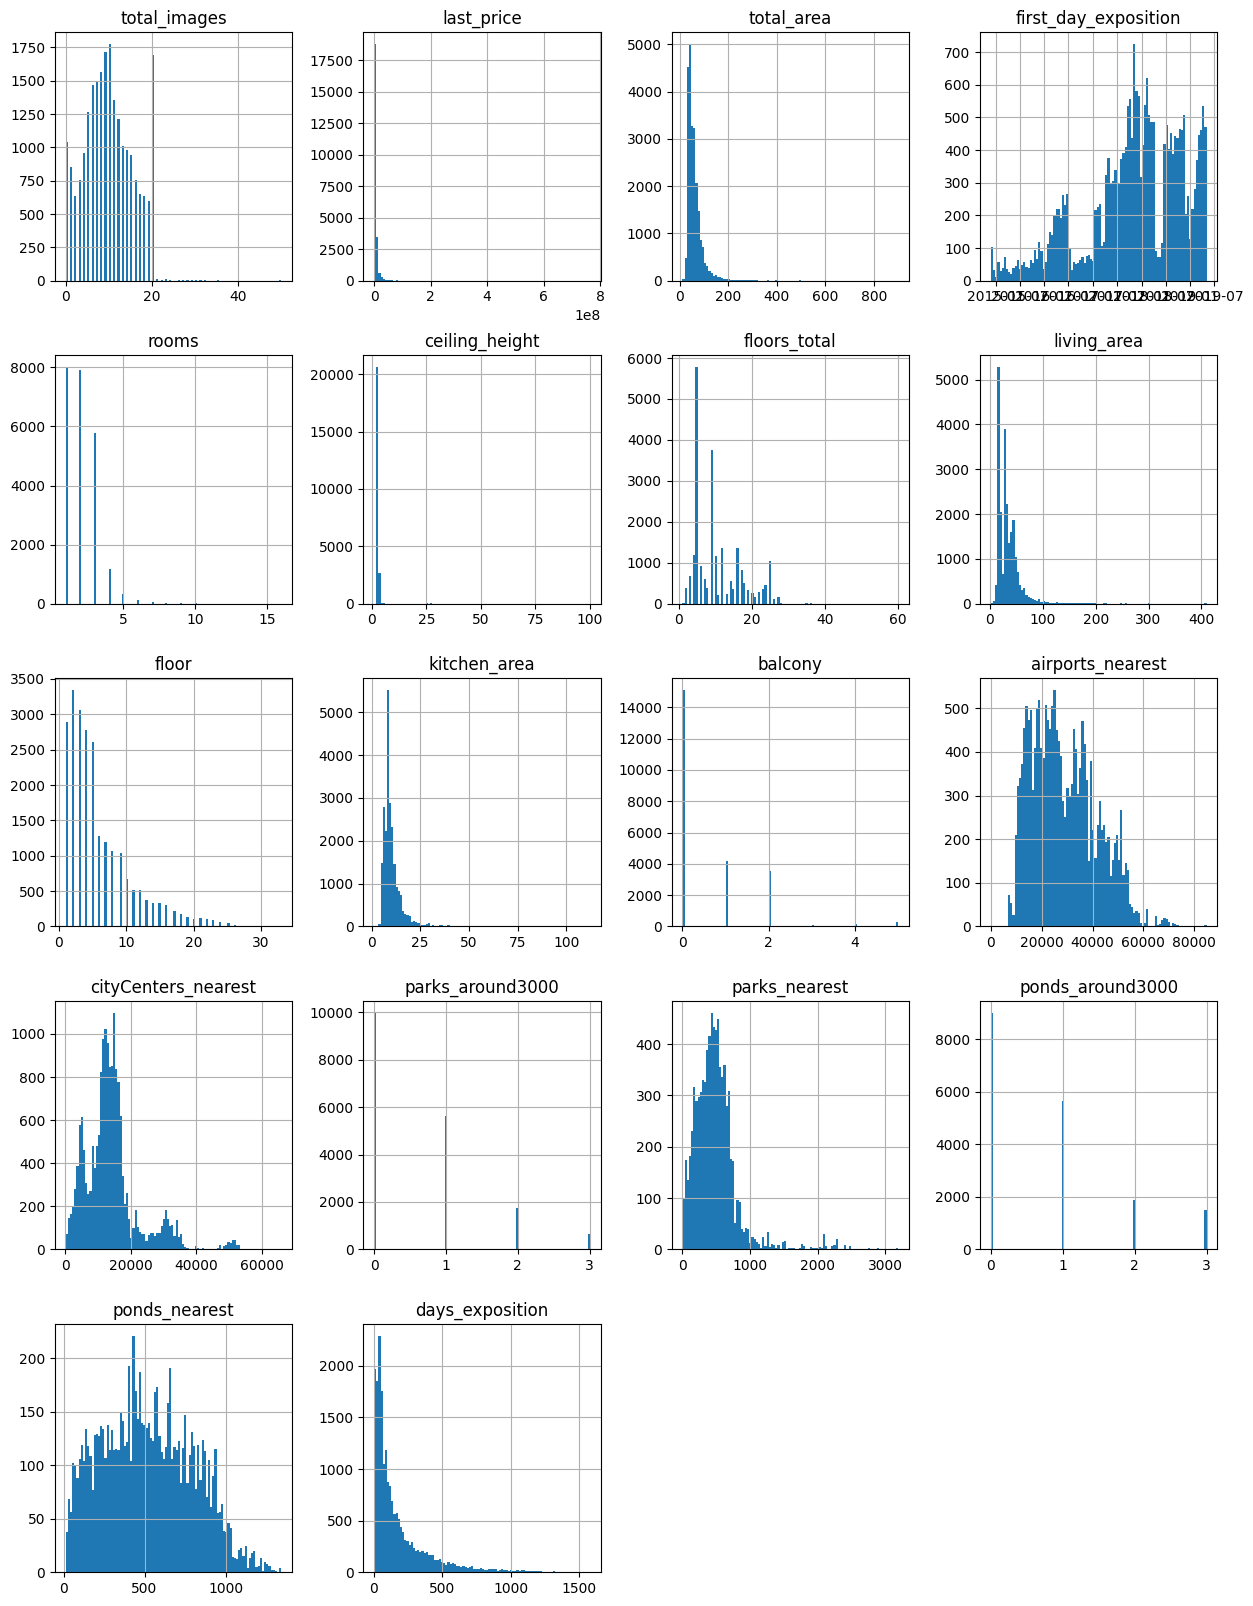

In [24]:
data.hist(bins=100, figsize=(15, 20))

In [25]:
data.isnull().sum()
#удаляем лишние строки, которые не характеризуют выборку
data = data.query('2.5 <= ceiling_height <= 3.25 & last_price <= 10000000 & \
                    floors_total <= 24 & total_area <= 200 & living_area <= 100 & \
                    kitchen_area <= 30 & floor <= 24 & 0 < rooms <= 5 & balcony <= 2')
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18640 entries, 1 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18640 non-null  int64         
 1   last_price            18640 non-null  float64       
 2   total_area            18640 non-null  float64       
 3   first_day_exposition  18640 non-null  datetime64[ns]
 4   rooms                 18640 non-null  int64         
 5   ceiling_height        18640 non-null  float64       
 6   floors_total          18640 non-null  float64       
 7   living_area           18640 non-null  float64       
 8   floor                 18640 non-null  int64         
 9   is_apartment          18640 non-null  bool          
 10  studio                18640 non-null  bool          
 11  open_plan             18640 non-null  bool          
 12  kitchen_area          18640 non-null  float64       
 13  balcony              

Удалили только "лишние" данные, там где нет пропусков.

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'first_day_exposition'}>],
       [<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>],
       [<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>],
       [<Axes: title={'center': 'cityCenters_nearest'}>,
        <Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>],
       [<Axes: title={'center': 'ponds_nearest'}>,
        <Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >]],
      dtype=object)

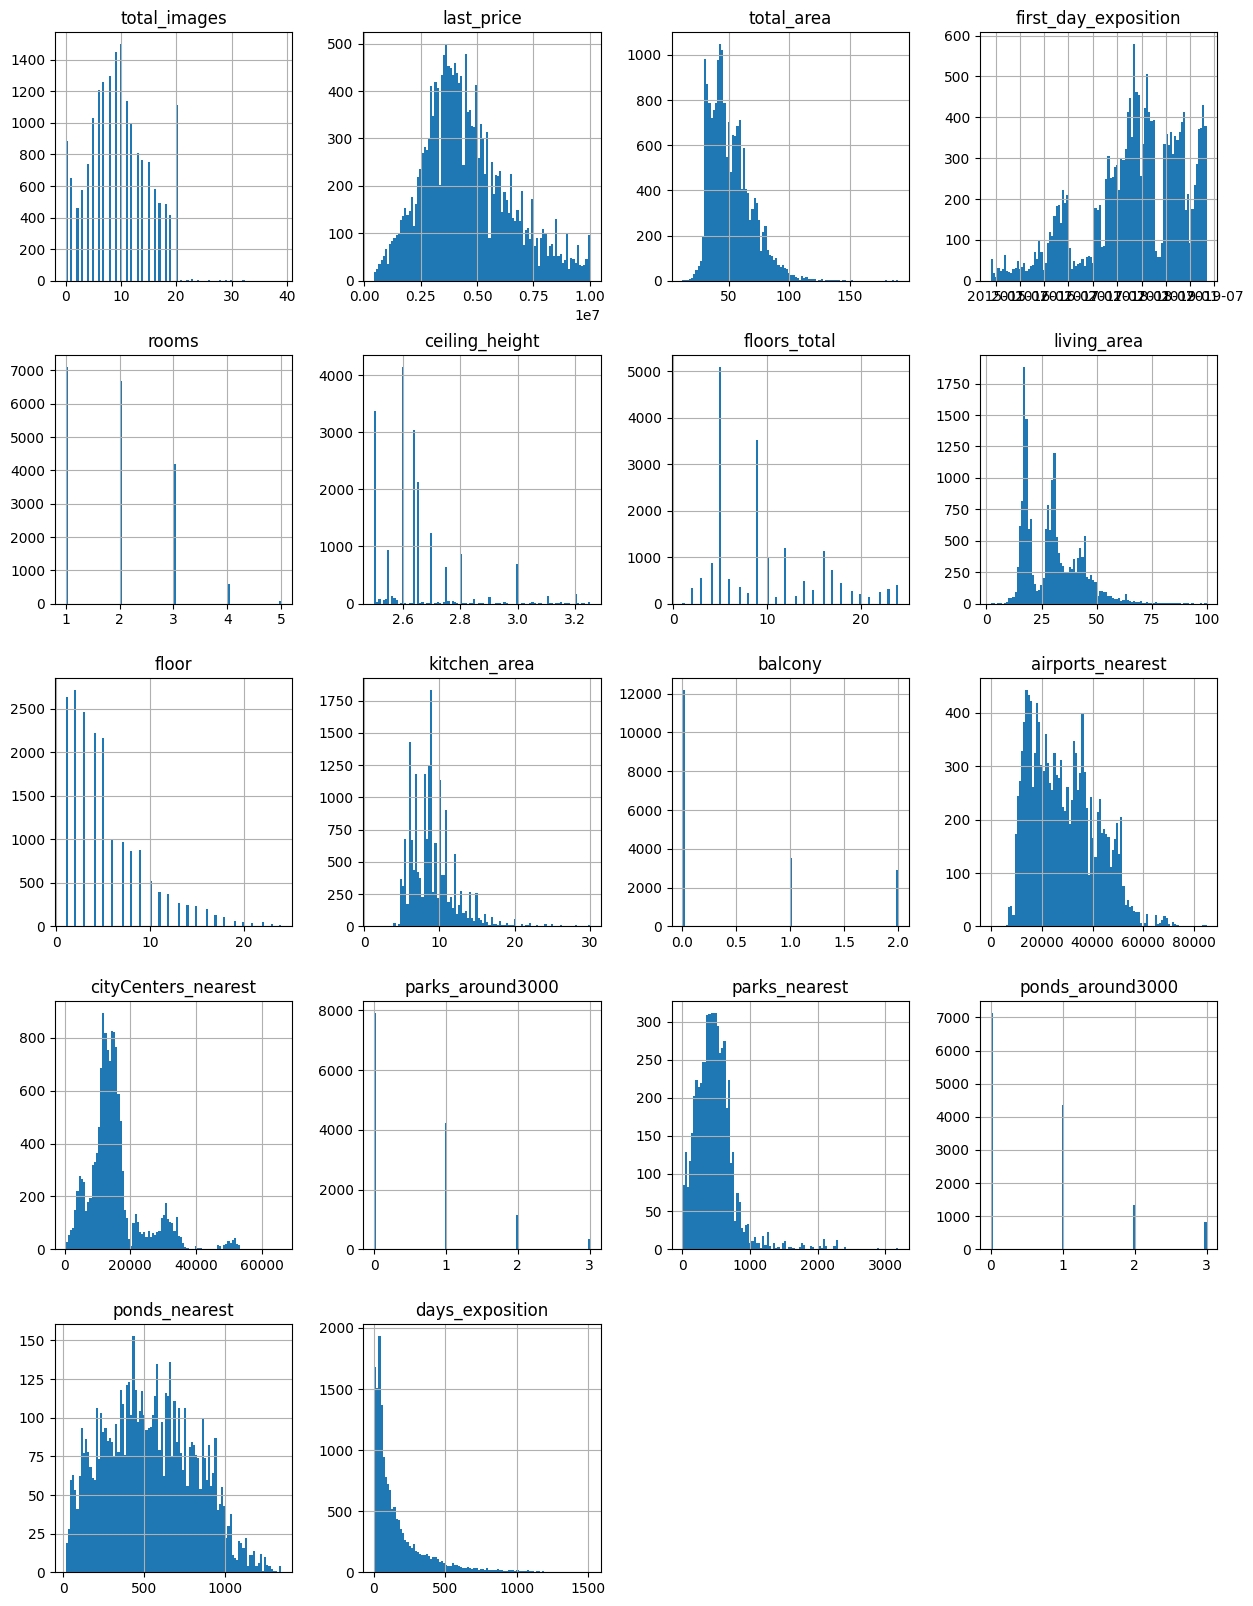

In [26]:
data.hist(bins=100, figsize=(15, 20))

In [27]:
good_data = data

### Посчитайте и добавьте в таблицу новые столбцы

In [28]:
#добавление столбца стоимости м2
good_data['metr_price'] = (good_data['last_price'] / good_data['total_area']).round(decimals=2)
#добавление столбца дня недели
good_data['day_of_week'] = good_data['first_day_exposition']. dt.weekday
#добавление столбца месяц
good_data['month'] = pd.DatetimeIndex(good_data['first_day_exposition']).month
#добавление столбца год
good_data['year'] = pd.DatetimeIndex(good_data['first_day_exposition']).year
#создание функции типа этажа - первый, последний, другой
def type_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floors_total - floor == 0:
        return 'последний'
    elif floors_total - floor == floors_total - 1:
        return 'первый'
    else:
        return 'другой'
#добавление столбца тип этажа
good_data['type_floor'] = good_data.apply(type_floor, axis=1)
#добавление столбца расстояние до центра в км
good_data['cityCenters_nearest_km'] = (good_data['cityCenters_nearest'] / 1000).round()
display(good_data.head(10))
good_data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,day_of_week,month,year,type_floor,cityCenters_nearest_km
1,7,3350000.0,40.4,2018-12-04,1,2.64,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
5,10,2890000.0,30.4,2018-09-10,1,2.64,12.0,14.4,5,False,...,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
7,5,7915000.0,71.6,2019-04-18,2,2.60,24.0,30.5,22,False,...,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой,14.0
11,9,3300000.0,44.0,2018-08-27,2,2.60,5.0,31.0,4,False,...,NaN,0.0,NaN,7.0,75000.00,0,8,2018,другой,52.0
12,10,3890000.0,54.0,2016-06-30,2,2.60,5.0,30.0,5,False,...,NaN,NaN,NaN,90.0,72037.04,3,6,2016,последний,NaN
13,20,3550000.0,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,294.0,3.0,298.0,366.0,82943.93,5,7,2017,последний,33.0
14,1,4400000.0,36.0,2016-06-23,1,2.64,6.0,17.0,1,False,...,NaN,1.0,96.0,203.0,122222.22,3,6,2016,первый,31.0


<class 'pandas.core.frame.DataFrame'>
Index: 18640 entries, 1 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            18640 non-null  int64         
 1   last_price              18640 non-null  float64       
 2   total_area              18640 non-null  float64       
 3   first_day_exposition    18640 non-null  datetime64[ns]
 4   rooms                   18640 non-null  int64         
 5   ceiling_height          18640 non-null  float64       
 6   floors_total            18640 non-null  float64       
 7   living_area             18640 non-null  float64       
 8   floor                   18640 non-null  int64         
 9   is_apartment            18640 non-null  bool          
 10  studio                  18640 non-null  bool          
 11  open_plan               18640 non-null  bool          
 12  kitchen_area            18640 non-null  float64    

### Проведите исследовательский анализ данных

<Axes: xlabel='type_floor'>

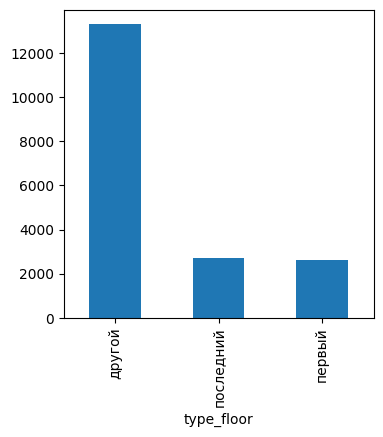

In [29]:
#Отдельно строим гитограмму по типу этажа
type_count = good_data['type_floor'].value_counts()
type_count.plot(kind='bar', figsize=(4, 4))

Большая часть квартир имеет тип этажа "другой", но в тоже время можно сказать, что в принципе продаются квартиры разной этажности.

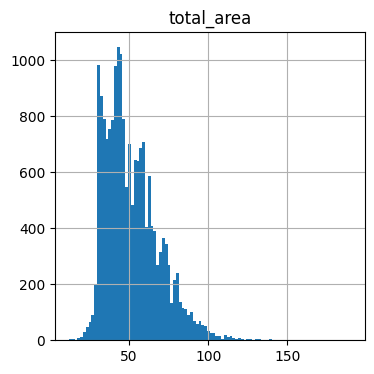

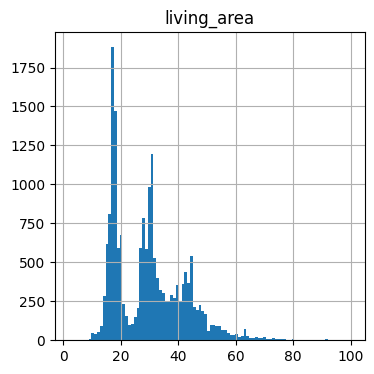

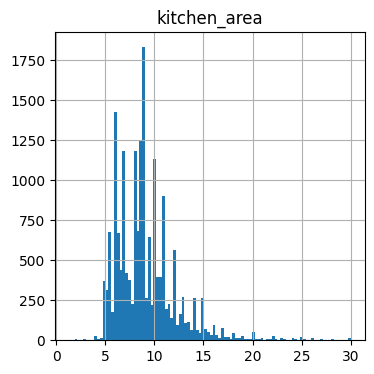

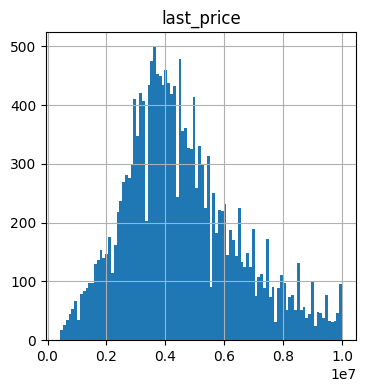

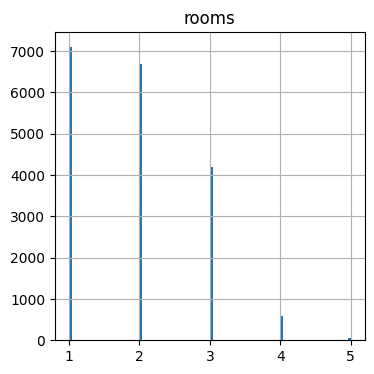

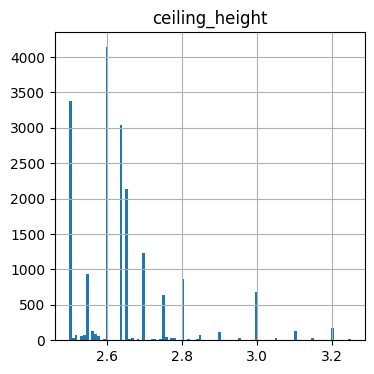

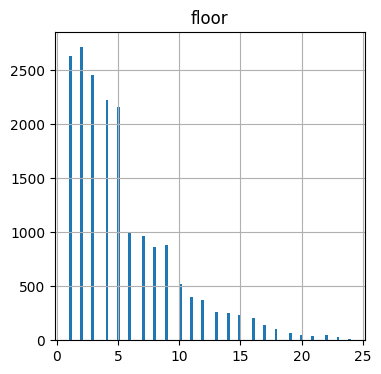

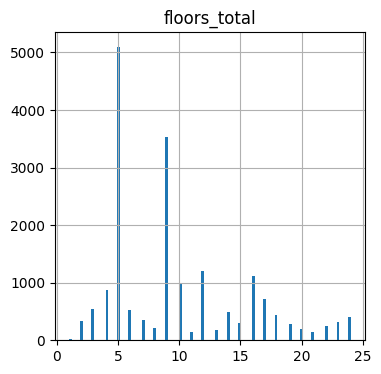

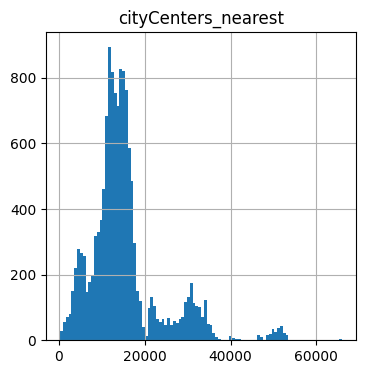

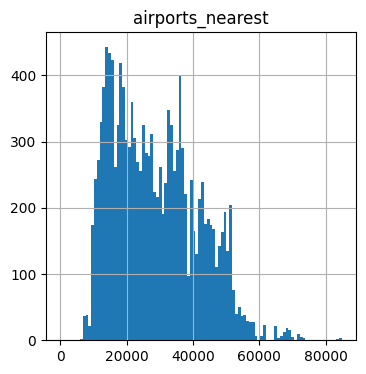

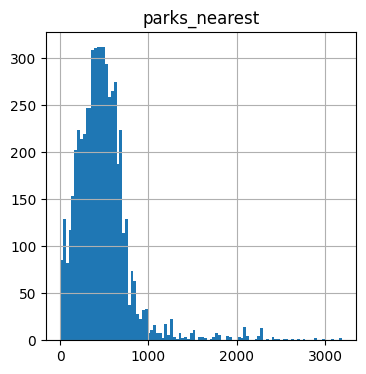

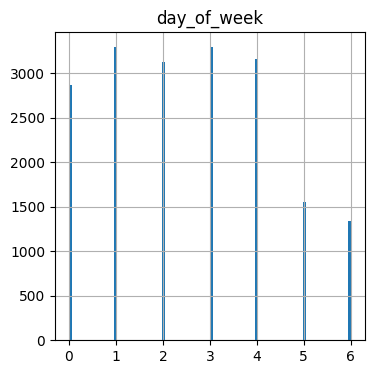

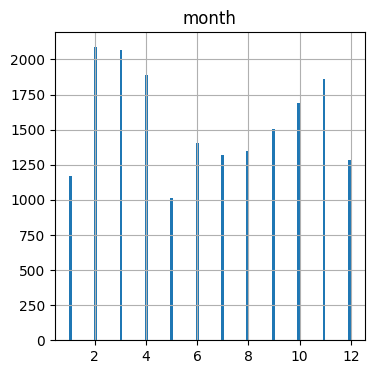

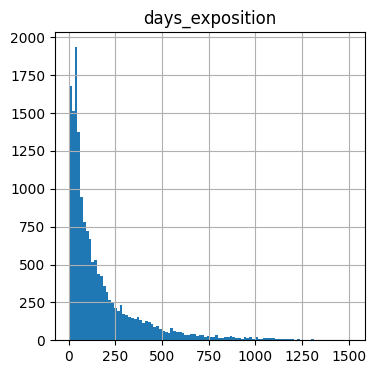

In [30]:
#Строим гистограммы по заданию
good_data_param = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', \
                   'floor', 'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', \
                   'day_of_week', 'month', 'days_exposition']
for column in good_data_param:
    good_data.hist(column, bins=100, figsize=(4, 4))


1. Общая площадь, жилая площадь и площадь кухни. На графиках видны четкие всплески, которые можно характеризовать типовыми квартирами: студии,1 - 25м2, 2 - 40м2, 3-60-70м2, их продается значительная доля. Опережает конечно всех, это студии и однокомнатные квартиры - это тенденция последних лет.
2. Цена - Мы видим нормально распределение по цене, но можно отметить, что основные продажи проходят по цене от 3 до 5 млн.
3. Количество комнат. Как мы видели на графике общей площади, основные продажи приходятся на 1-2 комнатные квартиры, в 1,5 раза меньше на 3х комнатные. 4-5 продаются редко.
4. Если посмотреть на график этажа, то можно выделить 3 группы: Это группа до 5го этажа, и их продается большинство, группа до 10го этажа, их продается в 2 раза меньше и остальные. Скорее всего можно предположить что здесь большую роль играет старый жилой фонд, когда дома строились до 5 этажей, а также фонд советстких времен, когда строили дома 9,10,12,16 этажей. Также большую роль здесь оказывают малые гоорода из области, где высотная застройка не ведется.
5. Высота потолков - основная доля квартир имеет потолки от 2,5м; 2,6м; 2,65м. Но есть и другие варианты, но они менее значительны.
6. Основная доля квартир продается в 12 и 15 км от центра, это вполне возможно с развитием новых ЖК.
7. Расстояние до аэропорта имеет три выраженных всплеска, в 15, 26 и 35 км.
8. Расстояние до парков имеет нормальное распределение, расстояние от основной доли квартир до парка не превышает 1000 м.
9. Дни недели - в основном сделки проходят в рабочие дни, реже в выходные.
10. На графике месяца мы видим сезонные всплески продаж весной и осенью.
11. Количество дней размещения - здесь мы видим, что в основном обьесты продаются в течении 100 дней, но бывают продажи доходят до 3 лет.

                 median        mean
locality_name                      
агалатово          42.0  223.666667
александровская    45.0   45.000000
алексеевка        416.0  416.000000
аннино            172.0  265.384615
аро               137.0  137.000000
...                 ...         ...
юкки               34.0   34.000000
ялгино             45.0   45.000000
яльгелево           7.0   33.666667
ям-тесово          82.5   82.500000
янино-1            58.0  123.454545

[276 rows x 2 columns]


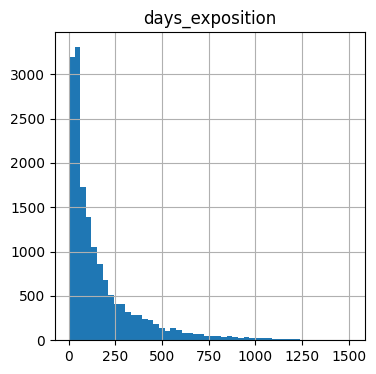

In [31]:
good_data.hist('days_exposition', bins=50, figsize=(4, 4))
#Считаем среднее и медиану для 'days_exposition'    
days_stat = good_data['days_exposition'].value_counts(ascending=False)
#display(days_stat.head(20))
days_stat_median = good_data.pivot_table(index='locality_name', values='days_exposition', aggfunc=['median', 'mean'])
days_stat_median.columns = ['median', 'mean']
print(days_stat_median)




#days_stat_median.plot(x=index, y='median', kind='hist', bins=100, figsize(4,4))
#days_stat_median.hist('mean', bins=100, figsize(4,4))
#good_data.hist(column, bins=100, figsize=(4, 4))

                 median        mean
locality_name                      
агалатово          23.5   23.500000
александровская    45.0   45.000000
алексеевка        416.0  416.000000
аннино            102.0  128.600000
аро               137.0  137.000000
...                 ...         ...
юкки               34.0   34.000000
ялгино             45.0   45.000000
яльгелево           7.0   33.666667
ям-тесово          82.5   82.500000
янино-1            55.0   97.150943

[272 rows x 2 columns]


array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

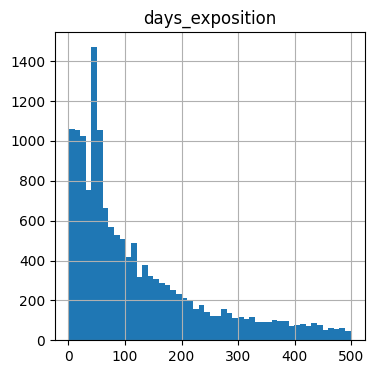

In [32]:
good_data.isnull().sum()
#удаляем лишние строки, которые не характеризуют выборку
good_data_days = good_data.query('days_exposition < 500')
#Считаем среднее и медиану для 'days_exposition'    

days_stat_median_days = good_data_days.pivot_table(index='locality_name', values='days_exposition', aggfunc=['median', 'mean'])
days_stat_median_days.columns = ['median', 'mean']
print(days_stat_median_days)
good_data_days.hist('days_exposition', bins=50, figsize=(4, 4))

По графику , как я уже указывал ранее, видно, что основная масса продаж происходит до 60 дней экспозиции, их можно считать быстрыми, от 60 до 260 дней - их меньше, можно назвать средними, но бывают обьекты, продажи которых происходят и до 4х лет, но их не большое количество. Мы видим, что медиана сильно меньше чем среднее значение, на это влияют выбросы с большим временем экспозиции. Если мы "обрежем хвост" данных до например 500 дней экспозиции, то мы увидим, что показатели медианы и среднего почти сравнялись, так как на срез данных перестали оказывать продажи с очень длинным сроком.

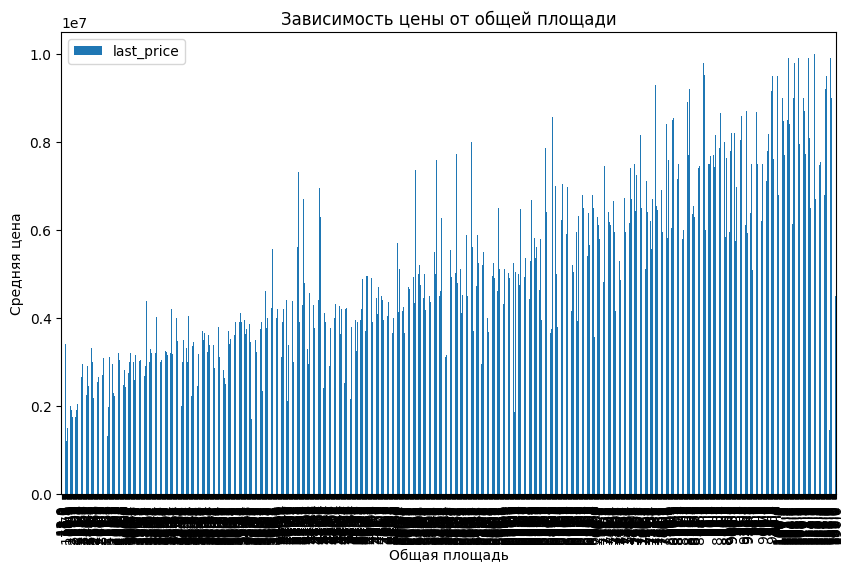

Зависимость цены от общей площади, коэффициент корреляции: 0.6448620667312417


In [33]:
#Строим графики зависимости цены от параметров 'total_area', 'living_area', \
#'kitchen_area', 'rooms', 'type_floor', 'day_of_week', 'month', 'year'
#good_data_columns = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'type_floor', 'day_of_week', 'month', 'year']
#for column in good_data_columns:
#    good_data.plot(x=column, y='last_price', kind='bar', grid=True)

import matplotlib.pyplot as plt
# Зависимость цены от общей площади
good_data_total_area = good_data.pivot_table(index='total_area', values='last_price', aggfunc='median')
#display(good_data_total_area)
good_data_total_area.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Общая площадь')
plt.ylabel('Средняя цена')
plt.title('Зависимость цены от общей площади')
plt.show()
print('Зависимость цены от общей площади, коэффициент корреляции:', good_data['last_price'].corr(good_data['total_area']))    

По графику видно, что в общем и целом с увеличением общей площади растет и цена, коэффициент корреляции 0,64 показывает что зависимость не очень сильная, но она есть.

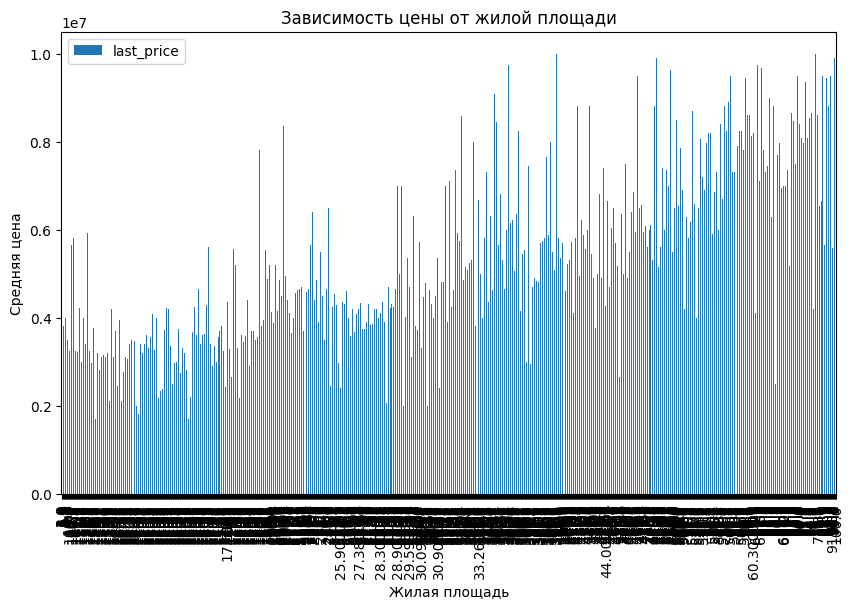

Зависимость цены от жилой площади, коэффициент корреляции: 0.5111654792844924


In [34]:
# Зависимость цены от жилой площади
good_data_living_area = good_data.pivot_table(index='living_area', values='last_price', aggfunc='median')
good_data_living_area.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Жилая площадь')
plt.ylabel('Средняя цена')
plt.title('Зависимость цены от жилой площади')
plt.show()
print('Зависимость цены от жилой площади, коэффициент корреляции:', good_data['last_price'].corr(good_data['living_area']))

По графику видно, что в общем и целом с увеличением жилой площади растет и цена, коэффициент корреляции 0,51 показывает что зависимость не очень сильная, но она есть, в тоже время зависимость слабее чем при анализе общей площади.

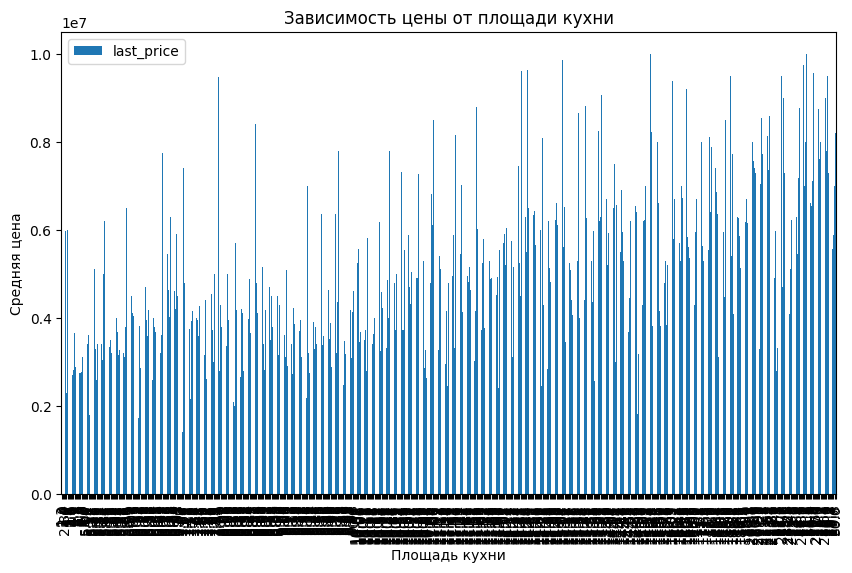

Зависимость цены от площади кухни, коэффициент корреляции: 0.4266467447998575


In [35]:
# Зависимость цены от площади кухни
good_data_kitchen_area = good_data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
good_data_kitchen_area.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Площадь кухни')
plt.ylabel('Средняя цена')
plt.title('Зависимость цены от площади кухни')
plt.show()
print('Зависимость цены от площади кухни, коэффициент корреляции:', good_data['last_price'].corr(good_data['kitchen_area']))

По графику видно, что в общем и целом с увеличением площади кухни растет и цена, коэффициент корреляции 0,42 показывает что зависимость еще слабее, но она присутствует.

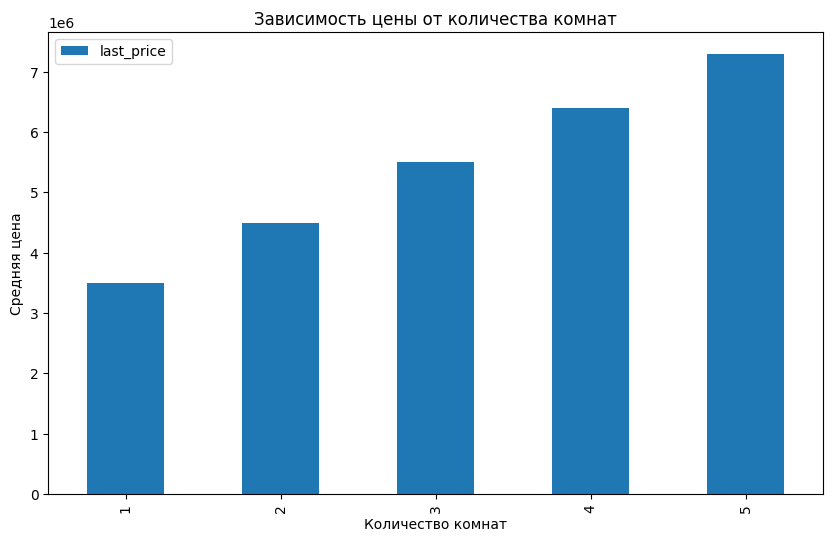

Зависимость цены от количества комнат, коэффициент корреляции: 0.4121491998421505


In [36]:
# Зависимость цены от количества комнат
good_data_rooms = good_data.pivot_table(index='rooms', values='last_price', aggfunc='median')
good_data_rooms.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена')
plt.title('Зависимость цены от количества комнат')
plt.show()
print('Зависимость цены от количества комнат, коэффициент корреляции:', good_data['last_price'].corr(good_data['rooms']))

Есть также зависимость и от количества комнат, что естественно, так как растет и площадь. 

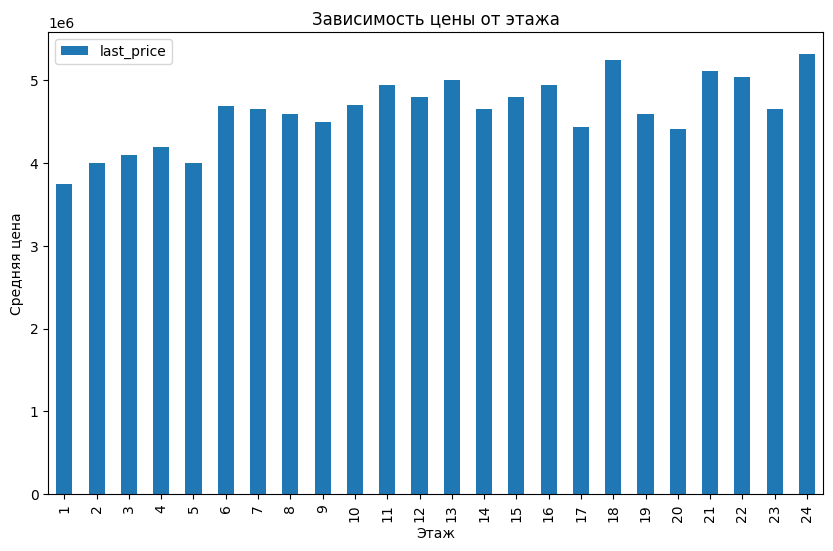

Зависимость цены от этажа, коэффициент корреляции: 0.15863861906017968


In [37]:
# Зависимость цены от этажа
good_data_floor = good_data.pivot_table(index='floor', values='last_price', aggfunc='median')
good_data_floor.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Этаж')
plt.ylabel('Средняя цена')
plt.title('Зависимость цены от этажа')
plt.show()
print('Зависимость цены от этажа, коэффициент корреляции:', good_data['last_price'].corr(good_data['floor']))

По графику мы видим лишь очень не значительную зависимость цены от этажа, на это же указывает и коэффициент корреляции. По графику видно что квартиры до 5 этажа стоят дешевле, чем квартиры более высокой этажности. Это вполне возможно может быть и потому, что квартиры до 5 этажа в основном в домах старого фонда, тогда как новостройки имеют высокую этажность, и стоят априори на рынке дороже чем квартиры в домах старого фонда.

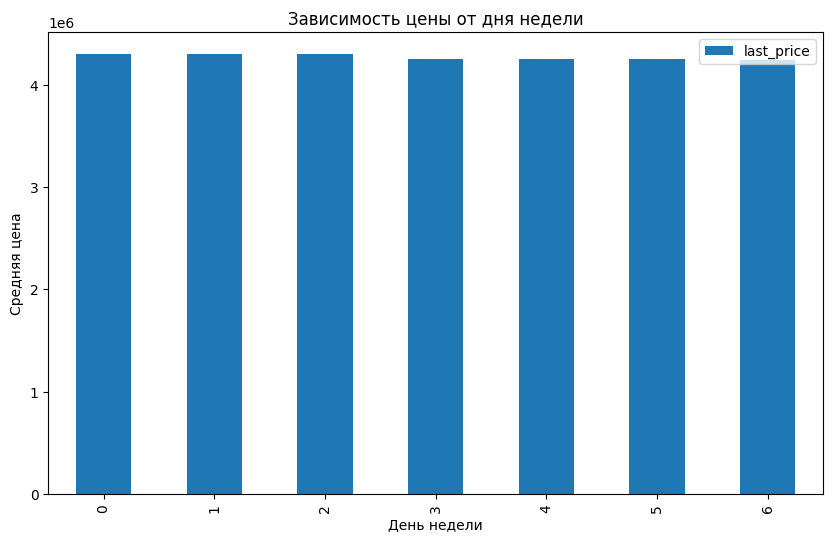

In [38]:
# Зависимость цены от дня недели
good_data_day_of_week = good_data.pivot_table(index='day_of_week', values='last_price', aggfunc='median')
good_data_day_of_week.plot(kind='bar', figsize=(10, 6))
plt.xlabel('День недели')
plt.ylabel('Средняя цена')
plt.title('Зависимость цены от дня недели')
plt.show()

График показывает что нет зависимости цены обьекта от дня недели, когда он был выставлен.

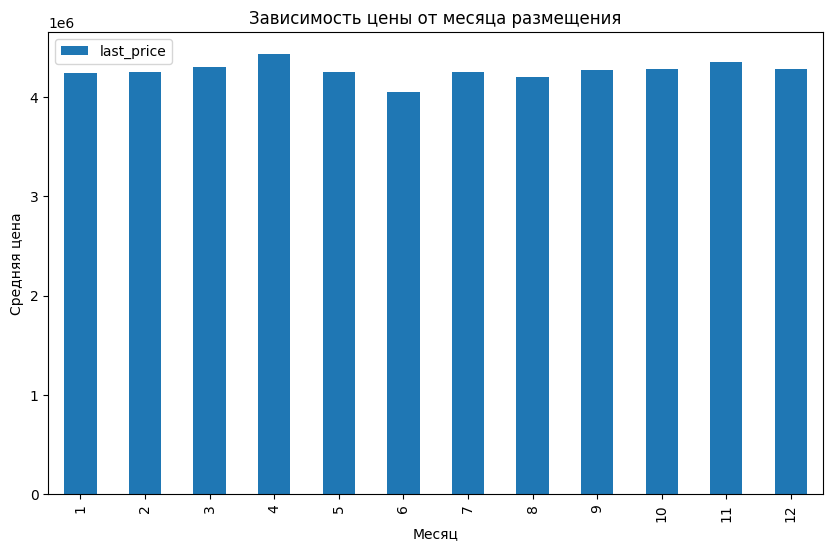

In [39]:
# Зависимость цены от месяца
good_data_month = good_data.pivot_table(index='month', values='last_price', aggfunc='median')
good_data_month.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Месяц')
plt.ylabel('Средняя цена')
plt.title('Зависимость цены от месяца размещения')
plt.show()

График показывает что нет зависимости цены обьекта от месяца, когда он был выставлен.

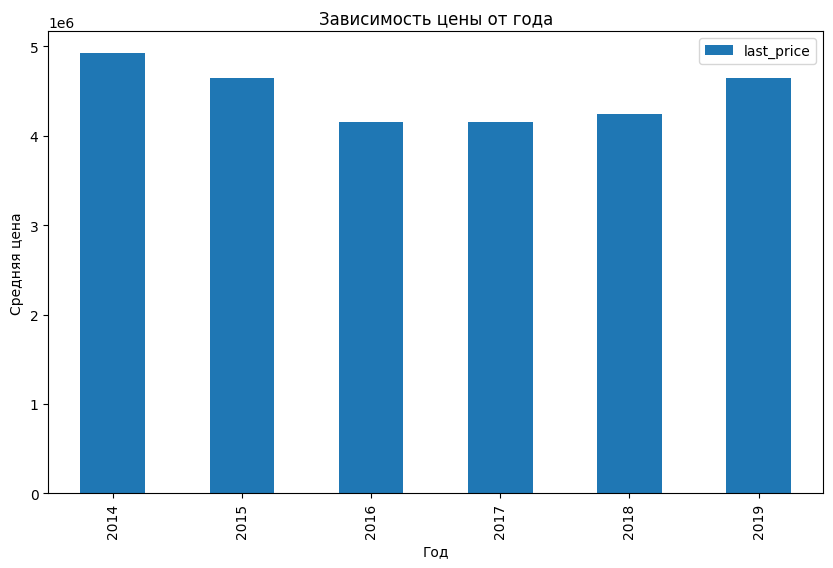

Зависимость цены от года, коэффициент корреляции: 0.0078075457972978275


In [40]:
# Зависимость цены от года
good_data_year = good_data.pivot_table(index='year', values='last_price', aggfunc='median')
good_data_year.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.title('Зависимость цены от года')
plt.show()
print('Зависимость цены от года, коэффициент корреляции:', good_data['last_price'].corr(good_data['year']))

Хотя график и описывает некую небольшую параболу зависимости цены от года, но коэффициент крреляции показывает что какой либо зависимости этих параметров нет.

1. На графике видно, что стоимость обьекта растет с размером общей площади, но встречаются и другие варианты.
2. Жилая площадь также влияет на цену
3. Размер кухни менее значительно, но влияет на цену
4. Количество комнат влияет на цену но не так значительно как площадь
5. Тип этажа: в общем и целом не первый или последний этаж продается дороже
6. Цена не зависит от дня недели, когда обьект выставлен
7. Есть небольшое отличие но в целом не зависит от месяца когда обьект выставлен
8. Мы видим что в 2017 и 2018 квартиры продавались дороже чем в остальные годы.

In [41]:
#Считаем среднюю цену м2 в ТОП10 населенных пунктах
grouped_name = good_data.groupby('locality_name')
#print(grouped_name.head())
name_counts = grouped_name.size().sort_values(ascending=False)
top_10_name = name_counts.head(10).index
average_price_per_sqm = grouped_name['metr_price'].mean().loc[top_10_name].round()
display(average_price_per_sqm.sort_values(ascending=False))
#Вывод населенных пунктов с самой высокой и самой низкой стоимсотью м2
name_with_highest_price = average_price_per_sqm.idxmax()
name_with_lowest_price = average_price_per_sqm.idxmin()
print('Населенный пункт с самой высокой стоимостью кв.м:',name_with_highest_price)
print('Населенный пункт с самой низкой стоимостью кв.м:',name_with_lowest_price)

locality_name
санкт-петербург    103530.0
пушкин             100261.0
кудрово             95296.0
мурино              85108.0
петергоф            82948.0
шушары              78806.0
колпино             75205.0
гатчина             68458.0
всеволожск          66605.0
выборг              57772.0
Name: metr_price, dtype: float64

Населенный пункт с самой высокой стоимостью кв.м: санкт-петербург
Населенный пункт с самой низкой стоимостью кв.м: выборг


1. Посчитана сренняя цена квадратного метра в Топ 10 населенных пунктов по количеству обьявлений
2. Нас пункт с самой высокой стоимостью - санкт-петербург, с самой низкой - выборг

Зависимость цены от расстояния в Санкт-Петербурге, коэффициент корреляции: -0.33728412744023517


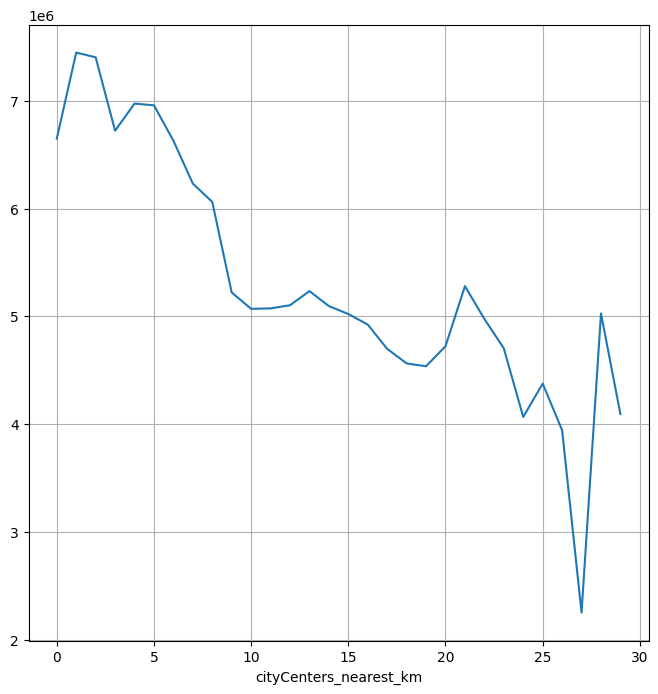

In [42]:
#Вычисляем среднюю цену цену километра в Санкт-Петербурге
#good_data['price_per_km'] = (good_data['last_price'] / good_data['cityCenters_nearest_km']).where(good_data['locality_name']\
#                                                                                                  == 'санкт-петербург')
good_data_spb = good_data.where(good_data['locality_name'] == 'санкт-петербург')
grouped_cityCenters = good_data_spb.groupby('cityCenters_nearest_km')
average_price = grouped_cityCenters['last_price'].mean().round()
#display(average_price.sort_values(ascending=False))
#print(average_price)
average_price.plot(y='last_price', kind='line', grid=True, figsize=(8, 8))
print('Зависимость цены от расстояния в Санкт-Петербурге, коэффициент корреляции:', good_data_spb['last_price'].corr(good_data_spb['cityCenters_nearest_km']))



Мы вычислили среднюю цену каждого километра в Санкт-Петербурге на удалении от центра. На основании графика можно сказать, что стоимость обьектов падает в зависимости от расстояния до центра. Зависимость не очень большая, так как коэффициент корреляции -0,34, но все же она есть. Цена резко падает после 25 км от центра, потом резко растет. 


### Общий вывод

1. Мы рассмотрели данные сервиса Яндекс.Недвижимость - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Данные содержат не только характеристики обьектов недвижимости, но и картографические данные, которые указывают на месторасположение этих обьектов, что позволяет лучше оценить их стоимость и возможный спрос. Была проведени работа по очистке этих данных от пропусков, дубликатов, по приведению значений колонок к единому формату, и привдению типов колонок к требуемуму.
2. В датафрейм были рассчитаны и добавлены дополнительные данные, содержащие информацию о стоимости квадратного метра, дне недили, месяце, года, типе этажа: "первый", "последний", "другой", расстояние до центра города в километрах.<br>
<br>
Анализ данных:<br>
<br>
1. Большая часть квартир имеет тип этажа "другой", но в тоже время можно сказать, что в принципе продаются квартиры разной этажности.
2. Общая площадь, жилая площадь и площадь кухни. На графиках видны четкие всплески, которые можно характеризовать типовыми квартирами: студии,1 - 25м2, 2 - 40м2, 3-60-70м2, их продается значительная доля. Опережает конечно всех, это студии и однокомнатные квартиры - это тенденция последних лет.
3. Цена - Мы видим нормально распределение по цене, но можно отметить, что основные продажи проходят по цене от 3 до 5 млн.
4. Количество комнат. Как мы видели на графике общей площади, основные продажи приходятся на 1-2 комнатные квартиры, в 1,5 раза меньше на 3х комнатные. 4-5 продаются редко.
5. Если посмотреть на график этажа, то можно выделить 3 группы: Это группа до 5го этажа, и их продается большинство, группа до 10го этажа, их продается в 2 раза меньше и остальные. Скорее всего можно предположить что здесь большую роль играет старый жилой фонд, когда дома строились до 5 этажей, а также фонд советстких времен, когда строили дома 9,10,12,16 этажей. Также большую роль здесь оказывают малые гоорода из области, где высотная застройка не ведется.
6. Высота потолков - основная доля квартир имеет потолки от 2,5м; 2,6м; 2,65м. Но есть и другие варианты, но они менее значительны.
7. Основная доля квартир продается в 12 и 15 км от центра, это вполне возможно с развитием новых ЖК.
8. Расстояние до аэропорта имеет три выраженных всплеска, в 15-20км 30-35 км.
9. Расстояние от основной доли квартир до парка не превышает 1000 м.
10. Дни недели - в основном сделки проходят в рабочие дни, реже в выходные.
11. Весной и осенью мы видим сезонные всплески продаж.
12. Основная масса продаж происходит до 60 дней экспозиции, их можно считать быстрыми, от 60 до 260 дней - их меньше, можно назвать средними, но бывают обьекты, продажи которых происходят и до 4х лет, но их не большое количество. Мы видим, что медиана сильно меньше чем среднее значение, на это влияют выбросы с большим временем экспозиции. Если мы "обрежем хвост" данных до например 500 дней экспозиции, то мы увидим, что показатели медианы и среднего почти сравнялись, так как на срез данных перестали оказывать продажи с очень длинным сроком.<br>
<br>
Зависимость цены от различных факторов:<br>
<br>
1. Цена зависит от общей площади, жилой площади, площади кухни, количества комнат. Практически не зависит, или завист очень мало от этажа, на котором расположен обьект недвижимости, ну и совсем не зависит от даты размещения обьявления - дня недели, месеца, года.
2. Стоимость квартир зависит от населенного пункта, для этого я рассчитал стоимость квадратного метра обьекта недвижимости в топ 10 самых продаваемых населенных пунктах. По результату видно, что самая высокая стоимость квартир в Санкт-Петербурге, а самая низкая в Выборге. 
3. Стоимость квартир зависит от удаления от центра города. На примере Санкт-Петербурга можно увидеть, что чем дальше от центра тем дешевле квартиры.<br>
<br>
По результатам исследований, стоит обратить на аномалии в данных по продажам, понять природу появления всплесков в различных данных, как например почему в Санкт-Петербурге после 27 км от центра вдруг резко возрастает цена квартир. В будущем необходимо сравнить полученные данные зависимости цены от расстояние до центра города по Санкт-Петербургу с другими, малыми городами. Есть ли там такая же четкая зависимость или этот фактор присущ только мегаполисам. Также, для того чтобы составить более точный прогноз, необходимо проанализировать данные и за последние годы, учитывая внешние факторы, оказывающие влияние на рынок в последний год.



